# Text Mining Assignment 
## --------------------------------------------------------------------------------------------------------------------------

## Problem Statement : For Text Mining assignment
 
### ONE :- 
#### * 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

## 1. Import necessary libraries :

In [1]:
!pip install spacy
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy
import wordcloud
from wordcloud import WordCloud
from matplotlib.pyplot import imread

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


2021-12-15 03:28:19.040337: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-12-15 03:28:19.040670: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## 2. Import Dataset :

In [4]:
elon_musk_data = pd.read_csv('Elon_musk.csv',sep=',',error_bad_lines= False,encoding='cp1252')
elon_musk_data

Unnamed: 0                                               Text
0              1                             @kunalb11 I’m an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [5]:
#Filtering the dataset
elon_musk_data.drop(labels='Unnamed: 0',axis=1,inplace=True)
elon_musk_data

Text
0                                @kunalb11 I’m an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

## 3. Text Pre-Processing :

In [6]:
 # remove both the leading and the trailing characters
elon_musk_data=[Text.strip() for Text in elon_musk_data.Text]
elon_musk_data[0:]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [7]:
 # removes empty strings, because they are considered in Python as False
elon_musk_data=[Text for Text in elon_musk_data if Text]
elon_musk_data[0:]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [8]:
# Joining the list into one string/text
string_text = ' '.join(elon_musk_data)
string_text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

## 4. Tokenization :

In [9]:
 #As we know that the data is the tweets data so to remove the usernames (i.e @Removeusernames)
# We import TweetTokenizer
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(strip_handles= True,reduce_len=True)
text_tokens = tokenizer.tokenize(string_text)
print(text_tokens[0:])

['I', '’', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '’', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can', 'be'

In [10]:
#Joining the new list again :
string_token_text = ' '.join(text_tokens)
string_token_text

'I ’ m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It ’ s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch th

In [11]:
#Removing the Website URL's 
import re
no_website_links = re.sub(r"http\S+", "", string_token_text)
no_website_links

'I ’ m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox !  Frodo was the underdoge , All thought he would fail , Himself most of all .  Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It ’ s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha  Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission !  Yes Once we can predict

In [12]:
no_tags_text = re.sub(r'<[^>]+>',' ',no_website_links)
print(no_tags_text)

I ’ m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox !  Frodo was the underdoge , All thought he would fail , Himself most of all .  Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It ’ s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account     This is true power haha  Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission !  Yes Once we can predict cash flow reasonably w

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Achyut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# Removing the punctuations :- with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)

no_punctuation_text = no_tags_text.translate(str.maketrans('', '', string.punctuation)) 
no_punctuation_text

'I ’ m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It ’ s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account     This is true power haha  Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reasonably well  Starlink will 

In [15]:
no_special_char= re.sub('[^a-zA-Z]', ' ', no_punctuation_text)
no_special_char

'I   m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It   s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account     This is true power haha  Any crypto wallet that won   t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reasonably well  Starlink will 

In [16]:
clean_text = " ".join(no_special_char.split())
print(clean_text)

I m an alien Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it Great interview Doge is underestimated Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox Frodo was the underdoge All thought he would fail Himself most of all Haha thanks Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with It s getting real Bought some Dogecoin for lil X so he can be a toddler hodler He definitely has issues but the sentencing seems a bit high Thanks for fixing Please unlock my account This is true power haha Any crypto wallet that won t give you your private keys should be avoided at all costs Your app sucks RT NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission Yes Once we can predict cash flow reasonably well Starlink will IPO Starlink is a staggeringly dif

In [17]:
from nltk.tokenize import word_tokenize
word_tokens=word_tokenize(no_special_char)
print(word_tokens)

['I', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing', 'Please', 'unlo

In [18]:
len(word_tokens)

16641

In [19]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in word_tokens if not word in my_stop_words]
print(no_stop_tokens[0:])

['I', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'haha', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Yes', 'Once', 'pr

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Achyut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Achyut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 5. Normalize the data :

In [20]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:])

['i', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'sent', 'just', 'agree', 'clubhouse', 'it', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'this', 'true', 'power', 'haha', 'any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'yes', 'once', 'pr

## 6. Stemming :

In [21]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:])

['i', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'just', 'sent', 'just', 'agre', 'clubhous', 'it', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'thank', 'fix', 'pleas', 'unlock', 'account', 'thi', 'true', 'power', 'haha', 'ani', 'crypto', 'wallet', 'give', 'privat', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavi', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission', 'ye', 'onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'st

## 7. Lemmatization :

In [22]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [23]:
doc = nlp(' '.join(lower_words))
print(doc[0:])

i alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power haha any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission yes once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes shipping this inte

In [24]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:])

['I', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'haha', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'yes', 'once', 'predict', 'cash', 'flow', 'reas

In [25]:
cleaned_elon_musk_tweet_data = ' '.join(lemmas)
cleaned_elon_musk_tweet_data

'I alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power haha any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission yes once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mars xprize team 

## 8. Feature Extraction:

### 8.1 Using Count Vectorizer :

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [27]:
print(vectorizer.vocabulary_)

{'alien': 84, 'ray': 2216, 'trace': 2866, 'cyberpunk': 651, 'hdr': 1230, 'nextlevel': 1828, 'have': 1225, 'try': 2896, 'great': 1179, 'interview': 1429, 'doge': 771, 'underestimate': 2937, 'congratulation': 558, 'tesla': 2775, 'china': 469, 'amazing': 105, 'execution': 934, 'last': 1513, 'year': 3150, 'now': 1856, 'next': 1827, 'even': 907, 'happy': 1212, 'new': 1825, 'ox': 1956, 'frodo': 1080, 'underdoge': 2936, 'all': 86, 'thought': 2809, 'would': 3135, 'fail': 967, 'himself': 1273, 'haha': 1200, 'thank': 2784, 'indeed': 1370, 'tweet': 2910, 'definitely': 686, 'represent': 2282, 'realworld': 2232, 'time': 2825, 'allocation': 88, 'the': 2789, 'entertaining': 878, 'outcome': 1935, 'likely': 1567, 'just': 1471, 'send': 2426, 'agree': 69, 'clubhouse': 498, 'it': 1448, 'get': 1138, 'real': 2227, 'buy': 391, 'dogecoin': 773, 'lil': 1568, 'toddler': 2837, 'hodler': 1279, 'he': 1231, 'issue': 1447, 'sentencing': 2432, 'seem': 2418, 'bit': 307, 'high': 1265, 'fix': 1028, 'please': 2051, 'unlo

In [28]:
print(vectorizer.get_feature_names()[0:])
print(X.toarray()[0:])

['aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'align', 'all', 'allocati', 'allocation', 'allow', 'alloy', 'almost', 'alone', 'along', 'alpha', 'already

In [29]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
print(X.toarray().shape)

(10947, 3169)


### 8.2 Using CountVectorizer with N-grams (Bigrams & Trigrams) :

In [31]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,5),max_features = 300)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas)

In [32]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['absolutely', 'accurate', 'actually', 'add', 'agree', 'ai', 'all', 'almost', 'also', 'although', 'amazing', 'and', 'appreciate', 'around', 'as', 'astronaut', 'autopilot', 'back', 'bad', 'bar', 'battery', 'be', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'build', 'but', 'call', 'camera', 'car', 'cargo', 'cell', 'change', 'close', 'come', 'company', 'complete', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'crew', 'day', 'definitely', 'design', 'difference', 'different', 'do', 'dock', 'doge', 'dojo', 'dragon', 'drive', 'droneship', 'early', 'earth', 'easy', 'electric', 'energy', 'engine', 'engineering', 'enough', 'even', 'ever', 'every', 'exactly', 'fair', 'falcon', 'far', 'fast', 'feel', 'fine', 'fire', 'first', 'fix', 'flap', 'flight', 'fly', 'for', 'fsd', 'full', 'fully', 'future', 'game', 'get', 'giga', 'give', 'go', 'good', 'great', 'haha', 'happen', 'hard', 'have', 'he', 'hear', 'heavy', 'help', 'high', 'home', 'hope', 'hopefully', 'hour'

### 8.3 Tf-Idf Vectorizer :

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'and', 'another', 'appear', 'apply', 'appreciate', 'approval', 'arm', 'around', 'article', 'as', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'bring', 'bs', 'build', 'burn', 'but', 'buy', 'cake', 'call', 'camera', 'can', 'car', 'cargo', 'cast', 'catch', 'cell', 'ch', 'chance', 'change', 'china', 'civilization', 'close', 'co', 'cold', 'color', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'cyberpunk', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', 'difference', 'different', 'do', 'dock', 'doge', 'dojo', 'dragon', 'drive', 'drone

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l1",analyzer='word', ngram_range=(1,3), max_features = 1000)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['able', 'abort', 'absolutely', 'accelerate', 'access', 'accurate', 'achieve', 'actual', 'actually', 'add', 'advanced', 'after', 'ago', 'agree', 'ahead', 'ahem', 'ai', 'aim', 'air', 'alien', 'all', 'allocation', 'allow', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'amount', 'analysis', 'ancient', 'and', 'another', 'anything', 'appear', 'apply', 'appreciate', 'approach', 'approval', 'approximately', 'architecture', 'arm', 'around', 'arrive', 'art', 'article', 'as', 'ask', 'astronaut', 'at', 'attack', 'august', 'austin', 'australia', 'automatically', 'autopilot', 'average', 'away', 'awesome', 'back', 'background', 'bad', 'bar', 'base', 'battery', 'bay', 'be', 'because', 'become', 'behind', 'believe', 'berlin', 'bet', 'beta', 'beyond', 'big', 'bit', 'bitcoin', 'blow', 'board', 'boca', 'body', 'booster', 'boring', 'both', 'brain', 'bring', 'bs', 'btw', 'bu', 'bug', 'build', 'burn', 'but', 'buy', 'cake', 'california', 'call', 'camera', 'can', 'canada', 'capture', 'car', 'c

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 9.Generating Word Cloud :

In [35]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

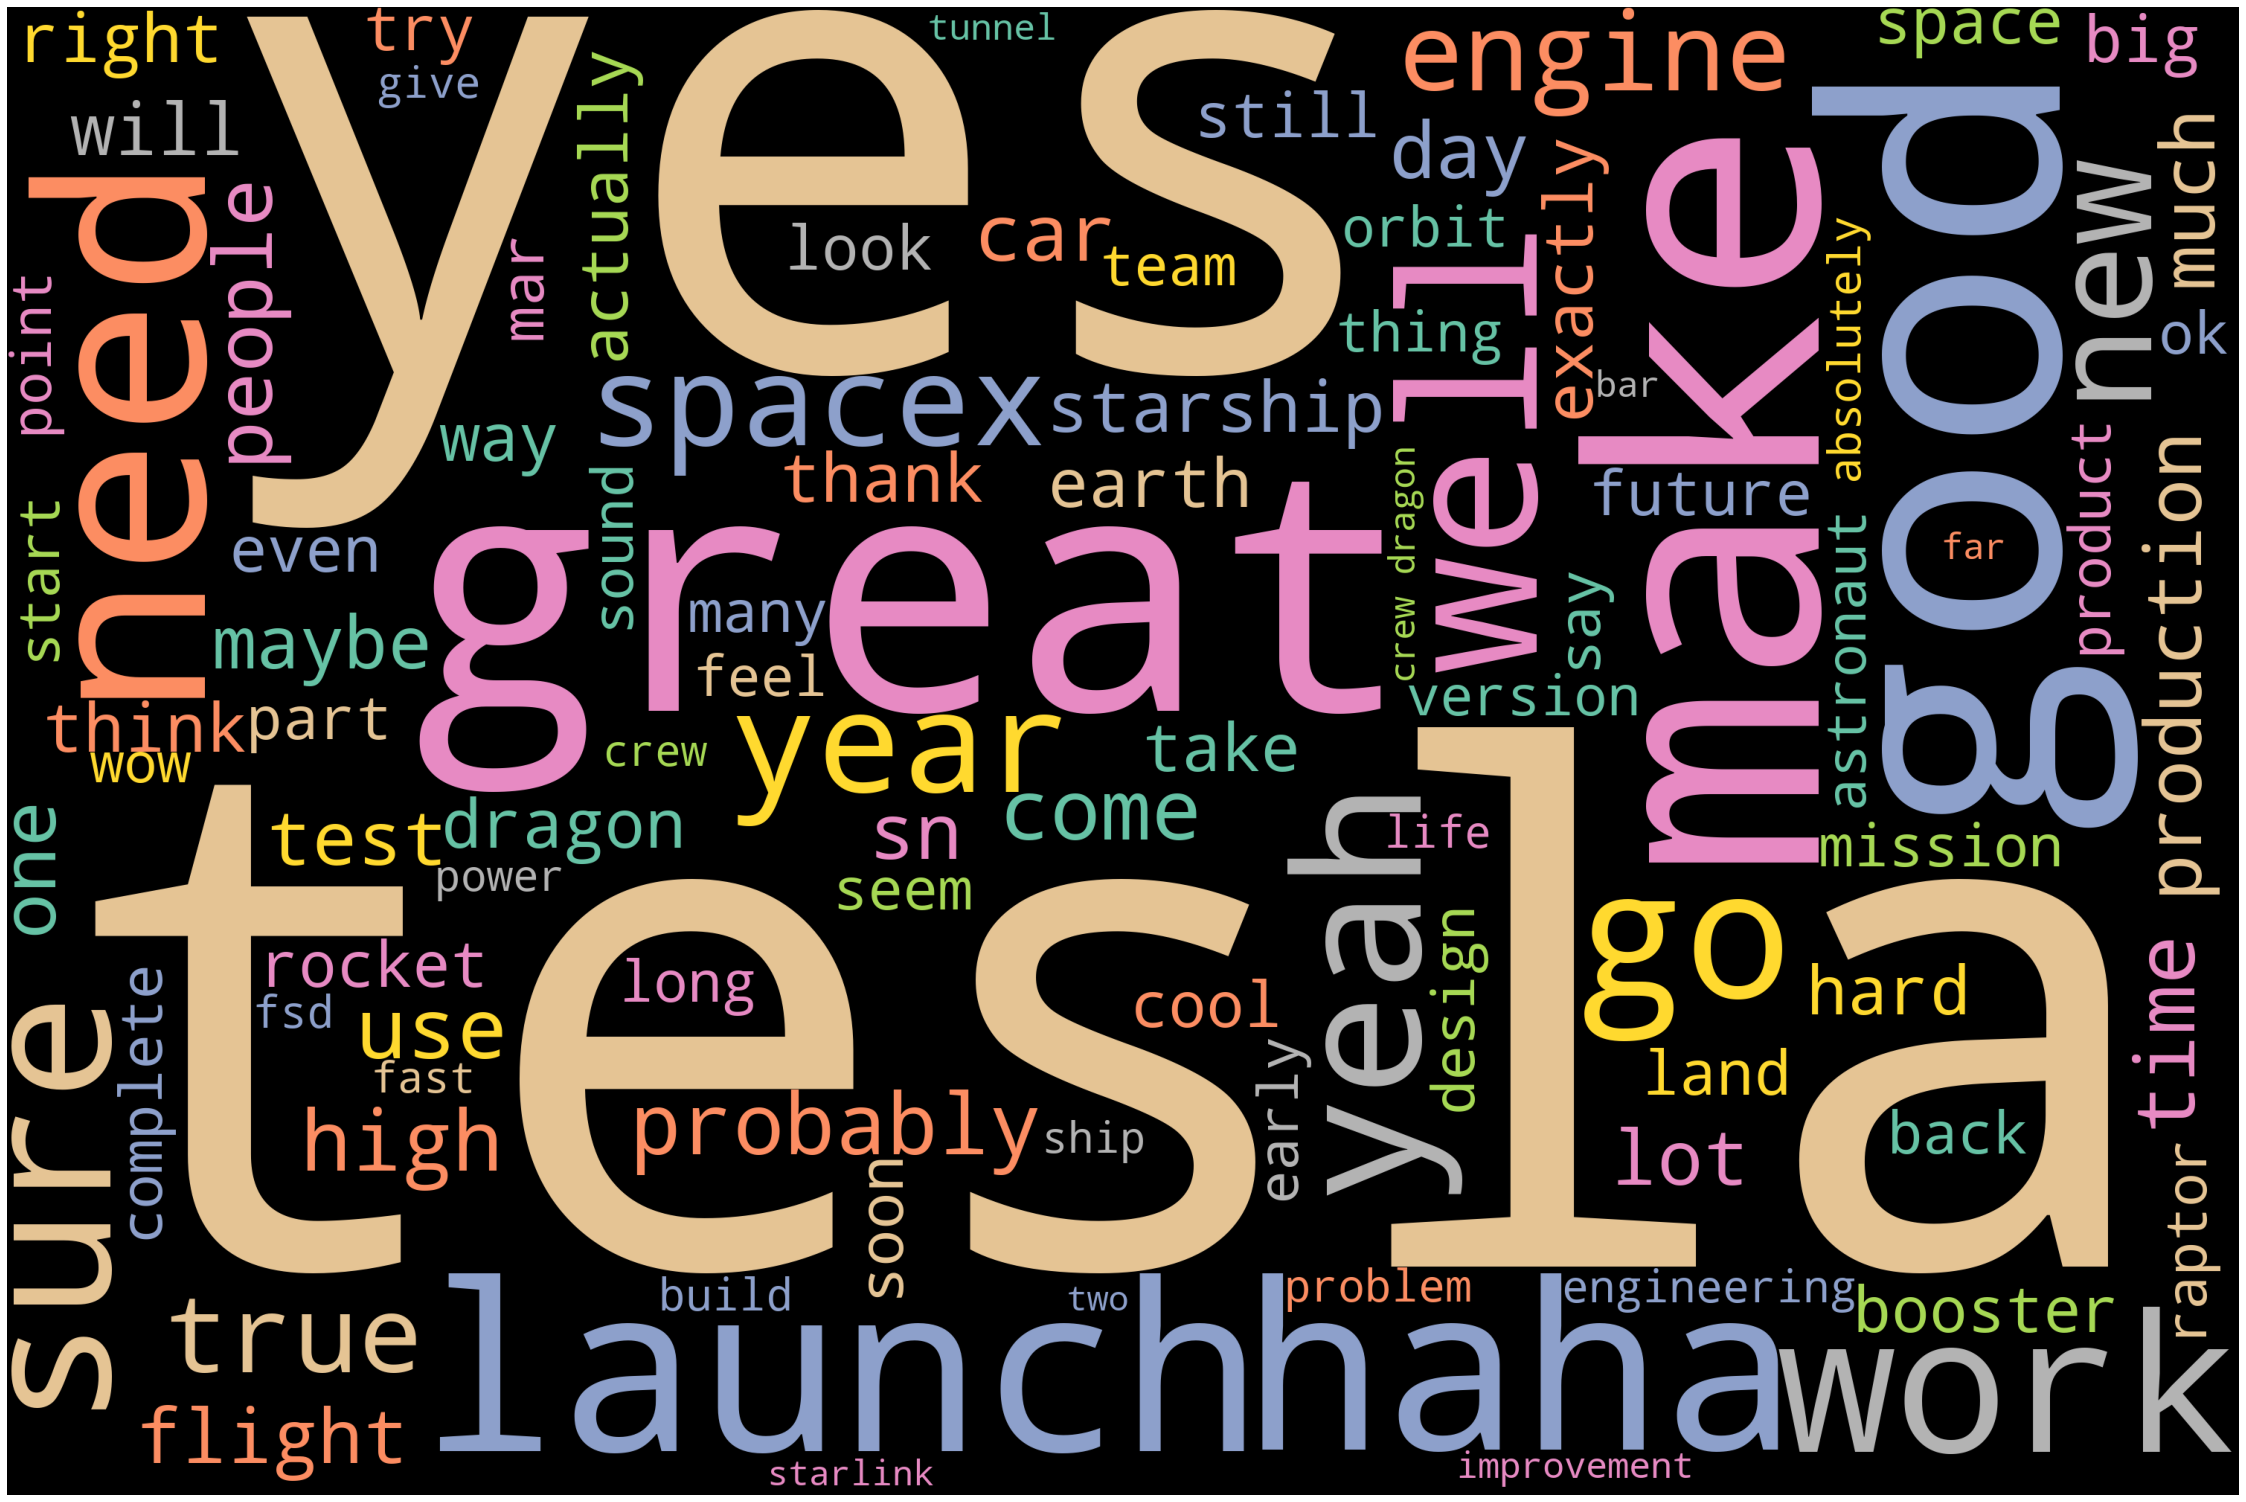

In [36]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('tall')
stopwords.add('able')
stopwords.add('ye')
stopwords.add('rt')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(cleaned_elon_musk_tweet_data)
# Plot
plot_cloud(wordcloud)

## 10. Named Entity Recognition :

In [37]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

In [38]:
one_block = cleaned_elon_musk_tweet_data
doc_block = nlp(cleaned_elon_musk_tweet_data)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [39]:
one_block

'I alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power haha any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission yes once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mars xprize team 

In [40]:
for token in doc_block[0:]:
    print(token, token.pos_)

I PRON
alien ADJ
ray NOUN
trace NOUN
cyberpunk NOUN
hdr PROPN
nextlevel NOUN
have AUX
try VERB
great ADJ
interview NOUN
doge PROPN
underestimate PROPN
congratulation PROPN
tesla PROPN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
happy ADJ
new ADJ
year NOUN
ox NOUN
frodo NOUN
underdoge PROPN
all DET
thought NOUN
would AUX
fail VERB
himself PRON
haha VERB
thank VERB
indeed ADV
tweet PROPN
definitely ADV
represent VERB
realworld PROPN
time NOUN
allocation NOUN
the DET
entertaining ADJ
outcome NOUN
likely ADV
just ADV
send VERB
just ADV
agree VERB
clubhouse NOUN
it PRON
get VERB
real ADJ
buy NOUN
dogecoin NOUN
lil NOUN
x NOUN
toddler NOUN
hodler NOUN
he PRON
definitely ADV
issue VERB
sentencing NOUN
seem VERB
bit NOUN
high ADJ
thank NOUN
fix NOUN
please INTJ
unlock VERB
account NOUN
this DET
true ADJ
power NOUN
haha NOUN
any DET
crypto ADJ
wallet NOUN
give VERB
private ADJ
key ADJ
avoid NOUN
cost VERB
your PRON
app NOUN
suck NOUN
rt PROPN
nasa PROPN
s

first ADV
return VERB
cargo NOUN
resupp NOUN
detanke NOUN
inspection NOUN
good ADJ
progress NOUN
towards ADP
hop X
go VERB
mar PROPN
goal NOUN
all DET
three NUM
static ADJ
fire NOUN
complete ADJ
rud PROPN
wow ADJ
lot NOUN
happen VERB
year NOUN
fair ADJ
enough ADJ
haha NOUN
sea NOUN
shanty ADJ
tiktok NOUN
take VERB
new ADJ
level NOUN
actual ADJ
pirate NOUN
ship NOUN
sure ADJ
today NOUN
spacex VERB
practice NOUN
starship NOUN
engine NOUN
start VERB
ship NOUN
hold VERB
massive ADJ
pin NOUN
engine NOUN
fir NOUN
as SCONJ
promise VERB
legalize NOUN
comedy NOUN
you PRON
steal VERB
name NOUN
logo NOUN
probably ADV
sue VERB
we PRON
try VERB
get VERB
people NOUN
mar VERB
help NOUN
would AUX
appreciate VERB
one NUM
day NOUN
get VERB
camera NOUN
also ADV
show VERB
star NOUN
field NOUN
background NOUN
rt PROPN
separation NOUN
confirm VERB
dragon NOUN
perform NOUN
departure NOUN
burn NOUN
move VERB
away ADV
suicide NOUN
double ADJ
homicide NOUN
absolutely ADV
hey INTJ
yeah INTJ
queen INTJ
you PRON
g

horn NOUN
change NOUN
horn NOUN
sound NOUN
holiday NOUN
jingle NOUN
late ADJ
tesla NOUN
software NOUN
update NOUN
merry PROPN
christmas PROPN
happy PROPN
holidays PROPN
great ADJ
game NOUN
it PRON
likely ADV
make VERB
sense NOUN
starlink NOUN
go VERB
public ADJ
revenue NOUN
growth NOUN
reasonably ADV
predictable ADJ
engineering NOUN
design NOUN
general ADJ
company NOUN
operation NOUN
absorb VERB
vast ADJ
majority NOUN
mind NOUN
fundamental ADJ
li PROPN
yes INTJ
a DET
month NOUN
come VERB
soon ADV
minor ADJ
yeah INTJ
story NOUN
rocket NOUN
turn NOUN
engine NOUN
control NOUN
fall VERB
yup INTJ
iron NOUN
bug NOUN
to PART
tesla VERB
owner NOUN
take VERB
delivery NOUN
final ADJ
day NOUN
year NOUN
support NOUN
super NOUN
appreciate VERB
frictionless ADV
ai VERB
what PRON
could AUX
possibly ADV
go VERB
wrong ADJ
good ADJ
idea NOUN
during ADP
dark ADJ
day NOUN
model NOUN
program NOUN
I PRON
reach VERB
tim PROPN
cook PROPN
discuss PROPN
possibility NOUN
strange ADJ
true ADJ
tesla NOUN
already A

rapid ADJ
complete ADJ
rocket NOUN
reuse VERB
low ADJ
cost NOUN
propellant NOUN
orbital ADJ
refill NOUN
propellant NOUN
production NOUN
yes INTJ
we PRON
still ADV
far ADV
simply ADV
video NOUN
control NOUN
the DET
big ADJ
gamechanger NOUN
cu NOUN
fsd PROPN
beta NOUN
come PROPN
day NOUN
improvement NOUN
significant ADJ
exciting ADJ
mission NOUN
wow INTJ
yea PROPN
tomorrow NOUN
th X
flight NOUN
rocket NOUN
landing NOUN
droneship NOUN
of ADP
course NOUN
I PRON
still ADV
love VERB
you PRON
sure ADV
true ADJ
we PRON
quiet ADJ
queue NOUN
product NOUN
build VERB
well ADJ
new ADJ
roadster NOUN
point NOUN
fate NOUN
love NOUN
irony NOUN
hate VERB
hypocrisy PROPN
rt PROPN
booster NOUN
separation NOUN
secondengine NOUN
start VERB
fair ADJ
separation NOUN
u PROPN
s PROPN
european PROPN
sentinel PROPN
michael PROPN
freilich PROPN
oceanobserve VERB
yes INTJ
our PRON
datum PROPN
center NOUN
name NOUN
skynet PROPN
joke NOUN
year NOUN
ago ADV
might AUX
tempt VERB
fate VERB
tesla NOUN
vehicle NOUN
create

sarscov PROPN
pcr ADJ
test NOUN
possible ADJ
gene NOUN
a DET
good ADJ
pcr ADJ
test NOUN
identify VERB
I PRON
cov VERB
spike NOUN
protein NOUN
although SCONJ
I PRON
hear VERB
mild ADJ
sniffle NOUN
cough NOUN
slight ADJ
fever NOUN
past ADP
day NOUN
right ADJ
symptom NOUN
although SCONJ
I PRON
take VERB
nyquil PROPN
technically ADV
I PRON
test VERB
positive ADJ
negative ADJ
twice ADV
positive ADJ
elon NOUN
musk NOUN
test NOUN
negati PROPN
the DET
carousel NOUN
turn VERB
ever ADV
fast ADJ
yup NOUN
exactly ADV
symptom ADJ
typical ADJ
cold ADJ
nothing PRON
unusual ADJ
far ADV
if SCONJ
happening VERB
happen VERB
other ADJ
I PRON
get VERB
pcr ADJ
test NOUN
separate ADJ
lab NOUN
result NOUN
take VERB
hour NOUN
something PRON
extremely ADV
bogus ADJ
go VERB
be AUX
test NOUN
covid VERB
four NUM
time NOUN
today NOUN
two NUM
test NOUN
come VERB
back ADV
negative ADJ
two NUM
cam NOUN
burst NOUN
disk NOUN
work NOUN
vehicle NOUN
appear VERB
ok INTJ
we PRON
swap VERB
least ADJ
one NUM
engine NOUN
maybe

smallseeme NOUN
issue NOUN
loss NOUN
upper ADJ
stage NOUN
camera NOUN
probably ADV
nothing PRON
serious ADJ
stand VERB
sure ADJ
now ADV
tesla VERB
fsd ADJ
beta NOUN
limited ADJ
release NOUN
fsd NOUN
price NOUN
new ADJ
upgrade NOUN
go VERB
k PROPN
monday PROPN
as ADV
soon ADV
complete ADJ
testing NOUN
regulator NOUN
approve VERB
so ADV
many ADJ
differe ADJ
yes INTJ
haha INTJ
dependent ADJ
prove VERB
high ADJ
safety NOUN
not PART
intentional ADJ
we PRON
want VERB
show NOUN
could AUX
theoretically ADV
convert VERB
entire ADJ
us PROPN
vehicle NOUN
f X
cold ADJ
gas NOUN
hot ADJ
later ADV
I PRON
mean VERB
ya PRON
got VERB
to ADP
tiki ADJ
bar NOUN
starship NOUN
nosecone NOUN
high PROPN
bay PROPN
tiki ADJ
bar NOUN
after SCONJ
get VERB
orbit NOUN
time NOUN
get VERB
little ADJ
melty NOUN
tbh PROPN
those DET
engine NOUN
could AUX
go VERB
bar NOUN
would AUX
dicey VERB
push ADJ
nearterm NOUN
test NOUN
achieve VERB
raptor NOUN
run VERB
sec PROPN
bar NOUN
chamber NOUN
pressure NOUN
encounter NOUN
iss

s PROPN
ahem NOUN
yes INTJ
rd INTJ
flight NOUN
booster NOUN
rd NOUN
flight PROPN
active ADJ
half ADJ
fair ADJ
aim NOUN
th ADP
flight NOUN
landing NOUN
booster NOUN
minute NOUN
launch NOUN
look VERB
good ADJ
far ADV
so ADV
crazy ADJ
subsidize NOUN
pollution NOUN
this DET
good ADJ
people NOUN
especially ADV
dense ADJ
city NOUN
heavy ADJ
it PRON
step VERB
right ADJ
direction NOUN
really ADV
aim VERB
full ADJ
reusability NOUN
large ADJ
ro ADP
turn VERB
volume NOUN
play VERB
powerglide ADV
tesla ADJ
fsd NOUN
solve VERB
issue NOUN
music NOUN
volume NOUN
tesla NOUN
go VERB
loud ADJ
one NUM
favorite ADJ
writer NOUN
foundation NOUN
tough ADJ
make VERB
movie NOUN
outstanding ADJ
potential ADJ
rewatche NOUN
young ADJ
frankenstein ADJ
weekend NOUN
still ADV
awesome ADJ
ovaltine VERB
the DET
remake NOUN
potential NOUN
great ADV
I PRON
kinda ADV
like ADP
original ADJ
tbh NOUN
possible ADJ
take VERB
level NOUN
hollywood NOUN
start NOUN
sequel NOUN
skip PROPN
original ADJ
financial ADJ
this DET
articl

hepa NOUN
filter NOUN
one NUM
day NOUN
if SCONJ
reich PROPN
actually ADV
care VERB
global ADJ
warming NOUN
make VERB
much ADJ
hot ADJ
air NOUN
nat NOUN
rlich PROPN
bitte PROPN
arbeiten VERB
sie VERB
bei PROPN
tesla PROPN
giga PROPN
berlin PROPN
es ADP
wird PROPN
super PROPN
spa NOUN
machen ADV
try VERB
tesla ADV
welcome INTJ
give VERB
back ADP
decide NOUN
prefer VERB
subaru PROPN
vera NOUN
rubin PROPN
observatory PROPN
cool PROPN
munger NOUN
right ADJ
blackschole NOUN
formula NOUN
kinda ADV
bs PROPN
big ADJ
difference NOUN
finance NOUN
approximation NOUN
fundamental ADJ
physics NOUN
pure ADJ
math NOUN
true ADJ
tesla NOUN
well ADV
understand VERB
collection NOUN
dozen NOUN
startup NOUN
mostly ADV
serie VERB
increasingly ADV
tesla VERB
r NOUN
d NOUN
productivity NOUN
exceptionally ADV
good ADJ
due ADJ
caliber NOUN
engineering NOUN
talent NOUN
tesla NOUN
model PROPN
s PROPN
x PUNCT
hospitalgrade PROPN
hepa NOUN
air NOUN
filter NOUN
y PROPN
really ADV
good ADJ
this DET
big ADJ
effect NOUN


small ADJ
percentage NOUN
total ADJ
compute NOUN
max NOUN
demonstrate NOUN
raptor NOUN
thrust VERB
ton PROPN
min PROPN
ton NOUN
actually ADV
that SCONJ
engine NOUN
sn NOUN
we PRON
build VERB
sn PROPN
ship NOUN
sn NOUN
test VERB
several ADJ
upgrade NOUN
bar NOUN
engine NOUN
for ADP
reference NOUN
bar NOUN
r NOUN
raptor NOUN
engine NOUN
reach VERB
bar NOUN
chamber NOUN
pressure NOUN
without ADP
explode NOUN
yeah INTJ
starship NOUN
tiny ADJ
dot NOUN
km NOUN
hard ADV
see VERB
naked ADJ
eye NOUN
we PRON
lot NOUN
flight NOUN
very ADV
impressive ADJ
render NOUN
note NOUN
leg NOUN
big ADJ
this PRON
might AUX
ste VERB
little DET
the DET
early ADJ
investor NOUN
part NOUN
tesla VERB
wrong ADJ
that PRON
bs NOUN
push VERB
eberhard ADJ
bad ADJ
person NOUN
I PRON
ever ADV
also ADV
could AUX
long ADV
period NOUN
comet NOUN
intersect ADJ
earth NOUN
right NOUN
we PRON
observe VERB
pretty ADV
much ADV
cybertruck NOUN
option NOUN
package NOUN
wow INTJ
my PRON
buttontwiddling NOUN
make VERB
sense NOUN
you 

fair ADJ
point NOUN
will AUX
discuss VERB
team NOUN
he PRON
amazing VERB
great PROPN
song PROPN
nickel NOUN
big ADJ
challenge NOUN
highvolume PROPN
longrange PROPN
battery PROPN
australia NOUN
can AUX
that PRON
haha VERB
this DET
lot NOUN
potential ADJ
lithium NOUN
pretty ADV
much ADV
everywhere ADV
whoa INTJ
cool ADJ
have AUX
blue ADJ
steel NOUN
we PRON
need VERB
high ADJ
brinell NOUN
hardness PROPN
high ADJ
corrosion NOUN
resistance NOUN
because SCONJ
cybertruck PROPN
faceted PROPN
I PRON
really ADV
want VERB
will AUX
great VERB
fun NOUN
could AUX
la DET
austin PROPN
turn VERB
shade ADJ
outdoor ADJ
restaurant NOUN
boca NOUN
cool VERB
yes INTJ
not PART
impossible ADJ
those DET
day NOUN
rt PROPN
rt PROPN
new ADJ
video NOUN
why SCONJ
tesla AUX
model VERB
y PROPN
their PRON
most ADV
important ADJ
car NOUN
auto NOUN
focus NOUN
ep PROPN
ring NOUN
fire NOUN
I PRON
know VERB
congratulation NOUN
people NOUN
bolivia VERB
the DET
song NOUN
I PRON
whistle NOUN
stranger ADJ
night NOUN
some PRON
s

In [41]:
nouns_verbs_adjectives = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB','ADJ')]
print(nouns_verbs_adjectives[0:])

['alien', 'ray', 'trace', 'cyberpunk', 'nextlevel', 'try', 'great', 'interview', 'amazing', 'execution', 'last', 'year', 'happy', 'new', 'year', 'ox', 'frodo', 'thought', 'fail', 'haha', 'thank', 'represent', 'time', 'allocation', 'entertaining', 'outcome', 'send', 'agree', 'clubhouse', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'unlock', 'account', 'true', 'power', 'haha', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'app', 'suck', 'heavy', 'launch', 'element', 'lunar', 'gateway', 'mission', 'predict', 'cash', 'flow', 'starlink', 'ipo', 'starlink', 'difficult', 'technical', 'economic', 'endeavor', 'spacex', 'need', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'low', 'cost', 'ton', 'carbon', 'sequester', 'net', 'value', 'product', 'make', 'scalable', 'mean', 'price', 'country', 'difference', 'taxis', 'ship', 'intend', 'earth', 'idea', 'apply', 'team', 'manage'

In [42]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs_adjectives)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:50]

word  count
0        tesla     75
1        great     73
2         good     71
3       launch     62
4         make     62
5         year     49
6         work     48
7         need     47
8           go     41
9         come     39
10         get     38
11        time     36
12      engine     36
13      dragon     36
14        haha     35
15        true     35
16         day     35
17         use     34
18    starship     33
19        high     32
20      people     32
21        test     32
22      spacex     31
23       first     31
24         car     31
25  production     30
26          rt     29
27         lot     29
28         new     28
29      flight     28
30        land     27
31        next     26
32     mission     25
33        sure     25
34        crew     23
35       think     23
36       thank     22
37       earth     22
38        take     22
39      falcon     21
40       point     21
41         big     21
42        week     21
43     booster     20
44         way     20
45        look     19
46      future     19
47       space     19
48      rocket     19
49    starlink     18

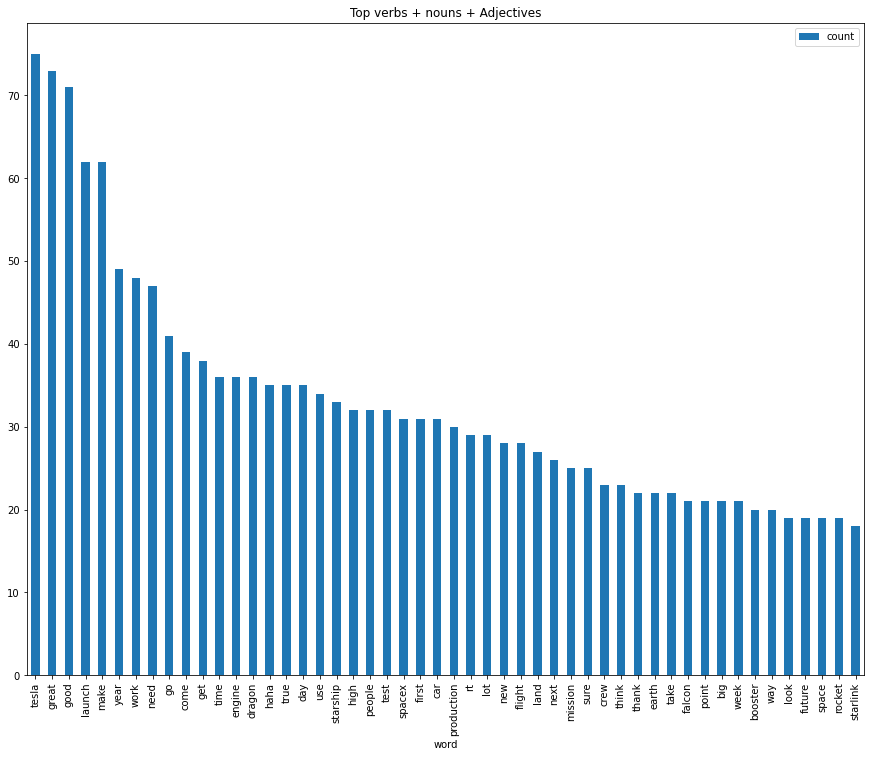

In [43]:
##Visualizing results
#Barchart for top 50 nouns + verbs + Adjectives
wf_df[0:50].plot.bar(x='word', figsize=(15,12), title='Top verbs + nouns + Adjectives')
plt.show()

## 11. Emotion Mining:

In [55]:
elon_musk_data = pd.read_csv('Elon_musk.csv',sep=',',error_bad_lines= False,encoding='cp1252')
elon_musk_data

Unnamed: 0                                               Text
0              1                             @kunalb11 I’m an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [56]:
#Filtering the dataset
elon_musk_data.drop(labels='Unnamed: 0',axis=1,inplace=True)
elon_musk_data

Text
0                                @kunalb11 I’m an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

In [57]:
 # remove both the leading and the trailing characters
elon_musk_data=[Text.strip() for Text in elon_musk_data.Text]
elon_musk_data[0:]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [58]:
 # removes empty strings, because they are considered in Python as False
elon_musk_data=[Text for Text in elon_musk_data if Text]
elon_musk_data[0:]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [59]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(" ".join(elon_musk_data))
sentences[0:]

['@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [60]:
sentences_df = pd.DataFrame(sentences, columns=['sentence'])
sentences_df

sentence
0    @kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
909  @kenyanwalstreet Not actually a payout, just a...
910  It may never pay out, as the stock can’t b… ht...
911                                    Details Aug 28.
912  AI symbiosis while u wait @vistacruiser7 @flcn...
913  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[914 rows x 1 columns]

In [61]:
afinn = pd.read_csv('Afinn.csv', sep=',',encoding='Latin-1')
afinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [62]:
afinn.shape

(2477, 2)

In [63]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [64]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [67]:
# test that it works
calculate_sentiment(text = 'good')

3

In [68]:
calculate_sentiment(text = 'riot')

-2

In [70]:
sentences_df['sentiment_value'] = sentences_df['sentence'].apply(calculate_sentiment)
sentences_df

sentence  sentiment_value
0    @kunalb11 I’m an alien @ID_AA_Carmack Ray trac...                0
1                                   Have you tried it?                0
2                  @joerogan @Spotify Great interview!                3
3    @gtera27 Doge is underestimated @teslacn Congr...                3
4                   Now on to the next for even more!!                0
..                                                 ...              ...
909  @kenyanwalstreet Not actually a payout, just a...                0
910  It may never pay out, as the stock can’t b… ht...               -4
911                                    Details Aug 28.                0
912  AI symbiosis while u wait @vistacruiser7 @flcn...               -2
913  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0

[914 rows x 2 columns]

In [71]:
# how many words are in the sentence?
sentences_df['word_count'] = sentences_df['sentence'].str.split().apply(len)
sentences_df['word_count'].head(50)

0      13
1       4
2       4
3      13
4       8
5       6
6      14
7      10
8       8
9     109
10     28
11     40
12     17
13      7
14     38
15     13
16      4
17     39
18      7
19      6
20     10
21      4
22      2
23     38
24     15
25     23
26      7
27      8
28     22
29      2
30     39
31     13
32     24
33     89
34      5
35     15
36    231
37     79
38     36
39     46
40      7
41     15
42     85
43      3
44      6
45     15
46      4
47     48
48     18
49     13
Name: word_count, dtype: int64

In [73]:
sentences_df.sort_values(by='sentiment_value').head(25)

sentence  sentiment_value  \
640  Very ba… https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
828  Cool Model 3 review by @iamjamiefoxx https://t...               -7   
64   Also, the road to hell is mostly paved with ba...               -7   
473  He plays the “poor inventor” card, but was ric...               -5   
910  It may never pay out, as the stock can’t b… ht...               -4   
672  Occasional flights from land are ok, but frequ...               -4   
604  Then static fire, checkouts, static fire, fly ...               -4   
709  That bs has been pushed by Eberhard (worst per...               -3   
429  @SpaceX Just a small-seeming issue with loss o...               -3   
878  Will those who write the algorithms ever reali...               -3   
23   https://t.co/UEEocOfcTb The people have spoken...               -3   
720                                    Those worry me.               -3   
735  @TimFernholz So why is this madness acceptable...               -3   
623                        You are a modern day moron.               -3   
474  Pretty odd… https://t.co/PPSorKWdI8 @enn_nafnl...               -3   
373  No problem if there’s a way get current design...               -3   
324  Their main PCR search is for the N1 gene, uniq...               -3   
214  RT @boringcompany: Tunnel Rave https://t.co/d3...               -3   
217  @RGVaerialphotos It will be real soon @MarcusH...               -3   
291  No symptoms for past few days, apart from fati...               -3   
348  Austin jobs now avai… https://t.co/d0i2w8wNKG ...               -3   
534  We are prioritizing emergency responders &amp;...               -3   
218  External… https://t.co/csIZk6sEVu @bcart03 @ne...               -3   
11   However, if we don… https://t.co/9Z8Ac6skqx @R...               -3   
278  Production/testing of rocket engines is over 9...               -3   

     word_count  
640          60  
828          61  
64           11  
473          34  
910          31  
672          39  
604          12  
709          25  
429          11  
878          11  
23           38  
720           3  
735          10  
623           6  
474          79  
373          13  
324          28  
214         129  
217          18  
291           9  
348          12  
534          13  
218          31  
11           40  
278          21

In [74]:
# Sentiment score of the whole review
sentences_df['sentiment_value'].describe()

count    914.000000
mean       1.358862
std        2.698889
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [76]:
# Sentiment score of the whole review
sentences_df[sentences_df['sentiment_value']<=0].head(20)

sentence  sentiment_value  \
0   @kunalb11 I’m an alien @ID_AA_Carmack Ray trac...                0   
1                                  Have you tried it?                0   
4                  Now on to the next for even more!!                0   
5                           Happy New Year of the Ox!                0   
6   https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
8   Tweets definitely do not represent real-world ...                0   
10  https://t.co/3pWt… @ajtourville Yes @BLKMDL3 @...                0   
11  However, if we don… https://t.co/9Z8Ac6skqx @R...               -3   
12  Must be scalable to g… https://t.co/XMyI7qWSgw...                0   
13    Only difference should be taxes &amp; shipping.                0   
14  @tobyliiiiiiiiii This is intended for Earth, b...                0   
15  My comp is all stock/options, which I do not t...                0   
16                        That’s what you’re missing.               -2   
18            Orbital launch tower that can stack\n2.                0   
19               Enough Raptors for orbit booster\n3.                0   
21                                 Ð is for Ðogecoin!                0   
22                               Instructional video.                0   
23  https://t.co/UEEocOfcTb The people have spoken...               -3   
27          Have to look at old notes, emails, texts.                0   
28  @AstroJordy Yes Lessons learned Of Earth and M...                0   

    word_count  
0           13  
1            4  
4            8  
5            6  
6           14  
8            8  
10          28  
11          40  
12          17  
13           7  
14          38  
15          13  
16           4  
18           7  
19           6  
21           4  
22           2  
23          38  
27           8  
28          22

In [78]:
sentences_df[sentences_df['sentiment_value']>=10].head(10)

sentence  sentiment_value  \
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               16   
80   @teslaownersSV This is a good one @MrBeastYT I...               13   
104  @Erdayastronaut @SpaceX Was also thinking that...               16   
149  @GUNMTLM3 @lexfridman No, but definitely this ...               10   
157  @harsimranbansal @heydave7 It will most likely...               11   
181  There’s some great AI out ther… https://t.co/v...               10   
182  Also, w… https://t.co/IYdKttVsqk @cleantechnic...               12   
222  @PPathole @karpathy For a second there, I thou...               11   
523  @TeslaClubIN @WholeMarsBlog @MKBHD Next year f...               10   
578  The “open” areas… https://t.co/rabjKrtQlw @Sav...               14   

     word_count  
36          231  
80           38  
104          94  
149          45  
157          93  
181          48  
182          99  
222          69  
523         121  
578         138

In [85]:
sentences_df['index']=range(0,len(sentences_df))

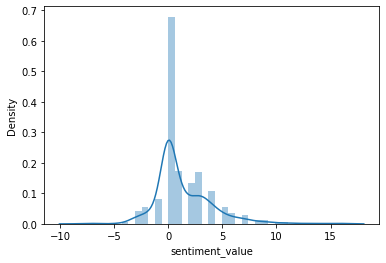

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sentences_df['sentiment_value'])
plt.show()

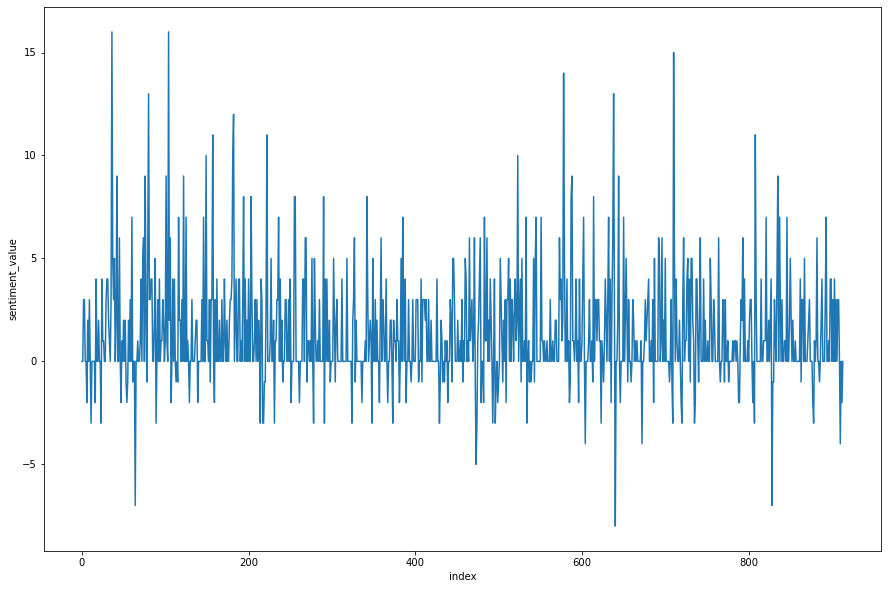

In [89]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sentences_df)
plt.show()

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

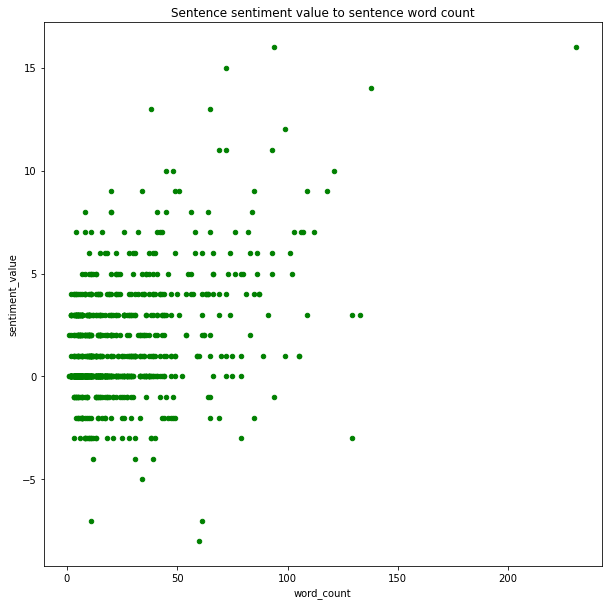

In [92]:
sentences_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(10,10), title='Sentence sentiment value to sentence word count',c='g')

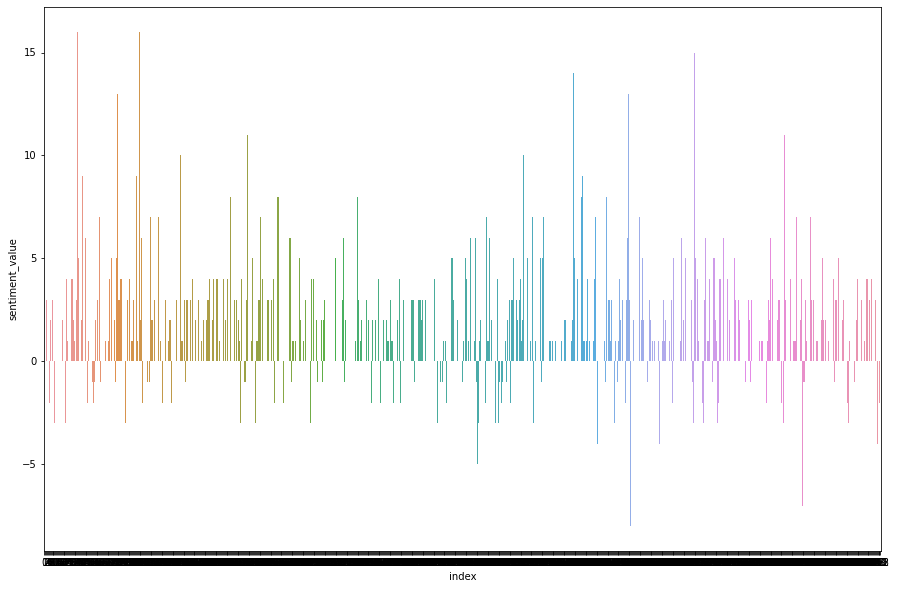

In [93]:
plt.figure(figsize=(15, 10))
sns.barplot(y='sentiment_value',x='index',data=sentences_df)
plt.show()